<a href="https://colab.research.google.com/github/snufkin92/colab_tutorial/blob/master/section_08/nlp_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNNによる自然言語処理
RNNを使って、文書の自動作成を行います。  
今回は、宮沢賢治の「銀河鉄道の夜」を学習データに使い、賢治風の文章を自動生成します。  
文章における文字の並びを時系列データと捉えて、次の文字を予測するようにRNNを訓練します。  
シンプルなRNN、LSTM、およびGRUの3つのRNNでそれぞれモデルを構築し、文章の生成結果を比較します。

## テキストデータの読み込み
Google ドライブからテキストデータを読み込みます。  
このノートブックと同じフォルダに、青空文庫の「銀河鉄道の夜」のテキストデータ"gingatetsudono_yoru.txt"がありますので、パスを指定して読み込みます。

In [1]:
from google.colab import drive

drive.mount('/content/drive/')
# nov_dir = 'Udemy_activity/ai_master_course/Section_8/'  # このフォルダへのパス
nov_dir = 'Colab Notebooks/ai_master_course/Section_08/'  # このフォルダへのパス
nov_path = '/content/drive/My Drive/' + nov_dir + 'gingatetsudono_yoru.txt'


# ファイルを読み込む
with open(nov_path, 'r') as f:
  nov_text = f.read()
  print(nov_text[:1000])  # 最初の1000文字のみ表示

Mounted at /content/drive/
「ではみなさんは、そういうふうに川だと云《い》われたり、乳の流れたあとだと云われたりしていたこのぼんやりと白いものがほんとうは何かご承知ですか。」先生は、黒板に吊《つる》した大きな黒い星座の図の、上から下へ白くけぶった銀河帯のようなところを指《さ》しながら、みんなに問《とい》をかけました。
　カムパネルラが手をあげました。それから四五人手をあげました。ジョバンニも手をあげようとして、急いでそのままやめました。たしかにあれがみんな星だと、いつか雑誌で読んだのでしたが、このごろはジョバンニはまるで毎日教室でもねむく、本を読むひまも読む本もないので、なんだかどんなこともよくわからないという気持ちがするのでした。
　ところが先生は早くもそれを見附《みつ》けたのでした。
「ジョバンニさん。あなたはわかっているのでしょう。」
　ジョバンニは勢《いきおい》よく立ちあがりましたが、立って見るともうはっきりとそれを答えることができないのでした。ザネリが前の席からふりかえって、ジョバンニを見てくすっとわらいました。ジョバンニはもうどぎまぎしてまっ赤になってしまいました。先生がまた云いました。
「大きな望遠鏡で銀河をよっく調べると銀河は大体何でしょう。」
　やっぱり星だとジョバンニは思いましたがこんどもすぐに答えることができませんでした。
　先生はしばらく困ったようすでしたが、眼《め》をカムパネルラの方へ向けて、
「ではカムパネルラさん。」と名指しました。するとあんなに元気に手をあげたカムパネルラが、やはりもじもじ立ち上ったままやはり答えができませんでした。
　先生は意外なようにしばらくじっとカムパネルラを見ていましたが、急いで「では。よし。」と云いながら、自分で星図を指《さ》しました。
「このぼんやりと白い銀河を大きないい望遠鏡で見ますと、もうたくさんの小さな星に見えるのです。ジョバンニさんそうでしょう。」
　ジョバンニはまっ赤になってうなずきました。けれどもいつかジョバンニの眼のなかには涙《なみだ》がいっぱいになりました。そうだ僕《ぼく》は知っていたのだ、勿論《もちろん》カムパネルラも知っている、それはいつかカムパネルラのお父さんの博士のうちでカムパネルラといっしょに読んだ雑誌のなかにあったのだ。それどこでなくカムパネルラは、その

## 正規表現による前処理
正規表現を使って、ルビなどを除去します。

In [2]:
print("置き換え前 文字数", len(nov_text))  # len() で文字列の文字数も取得可能

置き換え前 文字数 42281


In [3]:
import re  # 正規表現に必要なライブラリ

# subは置き換えメソッド(第１引数を空文字で置き換え)
text = re.sub("《[^》]+》", "", nov_text) # ルビの削除
text = re.sub("［[^］]+］", "", text) # 読みの注意の削除
text = re.sub("[｜ 　]", "", text) # | と全角半角スペースの削除
print("文字数", len(text))  # len() で文字列の文字数も取得可能

文字数 38753


In [4]:
print(type(text))
print(text[:1000])

<class 'str'>
「ではみなさんは、そういうふうに川だと云われたり、乳の流れたあとだと云われたりしていたこのぼんやりと白いものがほんとうは何かご承知ですか。」先生は、黒板に吊した大きな黒い星座の図の、上から下へ白くけぶった銀河帯のようなところを指しながら、みんなに問をかけました。
カムパネルラが手をあげました。それから四五人手をあげました。ジョバンニも手をあげようとして、急いでそのままやめました。たしかにあれがみんな星だと、いつか雑誌で読んだのでしたが、このごろはジョバンニはまるで毎日教室でもねむく、本を読むひまも読む本もないので、なんだかどんなこともよくわからないという気持ちがするのでした。
ところが先生は早くもそれを見附けたのでした。
「ジョバンニさん。あなたはわかっているのでしょう。」
ジョバンニは勢よく立ちあがりましたが、立って見るともうはっきりとそれを答えることができないのでした。ザネリが前の席からふりかえって、ジョバンニを見てくすっとわらいました。ジョバンニはもうどぎまぎしてまっ赤になってしまいました。先生がまた云いました。
「大きな望遠鏡で銀河をよっく調べると銀河は大体何でしょう。」
やっぱり星だとジョバンニは思いましたがこんどもすぐに答えることができませんでした。
先生はしばらく困ったようすでしたが、眼をカムパネルラの方へ向けて、
「ではカムパネルラさん。」と名指しました。するとあんなに元気に手をあげたカムパネルラが、やはりもじもじ立ち上ったままやはり答えができませんでした。
先生は意外なようにしばらくじっとカムパネルラを見ていましたが、急いで「では。よし。」と云いながら、自分で星図を指しました。
「このぼんやりと白い銀河を大きないい望遠鏡で見ますと、もうたくさんの小さな星に見えるのです。ジョバンニさんそうでしょう。」
ジョバンニはまっ赤になってうなずきました。けれどもいつかジョバンニの眼のなかには涙がいっぱいになりました。そうだ僕は知っていたのだ、勿論カムパネルラも知っている、それはいつかカムパネルラのお父さんの博士のうちでカムパネルラといっしょに読んだ雑誌のなかにあったのだ。それどこでなくカムパネルラは、その雑誌を読むと、すぐお父さんの書斎から巨きな本をもってきて、ぎんがというところをひろげ、まっ黒な頁いっぱいに白い点々のある美しい写真

## 各設定
RNNの各設定です。

In [5]:
n_rnn = 10  # 時系列の数（入力の文字数）
batch_size = 128
epochs = 60
n_mid = 128  # 中間層のニューロン数

## 文字のベクトル化
各文字をone-hot表現で表し、時系列の入力データおよび正解データを作成します。  
今回はRNNの最後の時刻の出力のみ利用するので、最後の出力に対応する正解のみ必要になります。

In [6]:
# setはstrを文字列に分解してくれる
sorted(list(set("こんにちは Tom!")))

[' ', '!', 'T', 'm', 'o', 'こ', 'ち', 'に', 'は', 'ん']

In [7]:
import numpy as np

# インデックスと文字で辞書を作成
chars = sorted(list(set(text)))  # setで文字の重複をなくし、各文字をリストに格納する
print("文字数（重複無し）", len(chars))

char_indices = {}  # 文字がキーでインデックスが値
for i, char in enumerate(chars):
    char_indices[char] = i

indices_char = {}  # インデックスがキーで文字が値
for i, char in enumerate(chars):
    indices_char[i] = char


def view_dict(my_dict):
  for key, value in list(my_dict.items())[:5]:
      print(key, ":", value)

print("インデックスがキー、文字が値")
view_dict(indices_char)
print("#####")
print("文字がキー、インデックスが値")
view_dict(char_indices)

文字数（重複無し） 1049
インデックスがキー、文字が値
0 : 

1 : …
2 : ※
3 : 、
4 : 。
#####
文字がキー、インデックスが値

 : 0
… : 1
※ : 2
、 : 3
。 : 4


In [8]:
print(len(text))

print(text[0: 0 + n_rnn])
print(text[0 + n_rnn])

print(text[1: 1 + n_rnn])
print(text[1 + n_rnn])

print(text[2: 2 + n_rnn])
print(text[2 + n_rnn])

38753
「ではみなさんは、そ
う
ではみなさんは、そう
い
はみなさんは、そうい
う


In [9]:
# 時系列データと、それから予測すべき文字を取り出します
time_chars = []
next_chars = []

# 0から38753 - 10の整数をループ
for i in range(0, len(text) - n_rnn):

    # iからi+9 まで文字列をlistに追加
    time_chars.append(text[i: i + n_rnn])

    # i+10番目の文字列（推測したい文字）を追加
    next_chars.append(text[i + n_rnn])

In [10]:
# 文字数 38753。10文字づつ入力させているので38743
print(len(time_chars))

print(time_chars[:3])
print(next_chars[:3])

38743
['「ではみなさんは、そ', 'ではみなさんは、そう', 'はみなさんは、そうい']
['う', 'い', 'う']


In [11]:
print(type(time_chars))

for i, t_cs in enumerate(time_chars):
    print(t_cs, "->", next_chars[i])
    print(char_indices[next_chars[i]])
    if i == 3:
        break

<class 'list'>
「ではみなさんは、そ -> う
14
ではみなさんは、そう -> い
13
はみなさんは、そうい -> う
14
みなさんは、そういう -> ふ
60


In [12]:
# 入力と正解をone-hot表現で3次元データを作成表します
# len(time_chars)：入力シーケンスの数（各シーケンスがモデルへの入力）
# n_rnn：この値ごとにone-hot化を行う（文字ではなく単語やフレーズといった文字列間の時系列を表現する）
# len(chars)： 文書内のユニークな全文字数
# dtype=np.bool_で xの各要素をboole(0/1)のみ持たせるようにしている
x = np.zeros((len(time_chars), n_rnn, len(chars)), dtype=np.bool_)
t = np.zeros((len(time_chars), len(chars)), dtype=np.bool_)

# 各入力シーケンス毎に処理（i:シーケンスのインデックス番号、t_cs：入力の文字列
for i, t_cs in enumerate(time_chars):
    # i番目の入力の正解をone-hot表現で表す
    # char_indices[next_chars[i]] が正解文字のインデックス
    t[i, char_indices[next_chars[i]]] = 1

  # 入力をone-hot表現で表す（jは0-9までのインデックス）
    for j, char in enumerate(t_cs):
        x[i, j, char_indices[char]] = 1

print("xの形状", x.shape)
print("tの形状", t.shape)

xの形状 (38743, 10, 1049)
tの形状 (38743, 1049)


In [13]:
print(t[0])

# 1番目の入力シーケンス。1回あたり10文字なので10行
print(x[0].shape)

[False False False ... False False False]
(10, 1049)


## モデルの構築
SimpleRNN、LSTM、GRUの層を使ったモデルをそれぞれ構築します。

In [14]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU

# 異なるのはSimpleRNN、LSTM、GRUを宣言するか？だけ、他のパラメータは同じ
# n_mid：各タイムステップの出力ニューロン数
# n_rnn：入力の行数（1回の入力で利用する文字数）
# len(chars)：入力の列数（ユニークな文字数）

# SimpleRNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(n_mid, input_shape=(n_rnn, len(chars))))
model_rnn.add(Dense(len(chars), activation="softmax"))
model_rnn.compile(loss='categorical_crossentropy', optimizer="adam")
print(model_rnn.summary())

# LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(n_mid, input_shape=(n_rnn, len(chars))))
model_lstm.add(Dense(len(chars), activation="softmax"))
model_lstm.compile(loss='categorical_crossentropy', optimizer="adam")
print(model_lstm.summary())

# GRU
model_gru = Sequential()
model_gru.add(GRU(n_mid, input_shape=(n_rnn, len(chars))))
model_gru.add(Dense(len(chars), activation="softmax"))
model_gru.compile(loss='categorical_crossentropy', optimizer="adam")
print(model_gru.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               150784    
                                                                 
 dense (Dense)               (None, 1049)              135321    
                                                                 
Total params: 286105 (1.09 MB)
Trainable params: 286105 (1.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               603136    
                                                                 
 dense_1 (Dense)             (None, 1049)              135321    
                                                           

## 文書生成用の関数
各エポックの終了後、文章を生成するための関数を記述します。  
LambdaCallbackを使って、エポック終了時に実行される関数を設定します。

In [15]:
from keras.callbacks import LambdaCallback

def on_epoch_end(epoch, logs):
    print("エポック: ", epoch)

    beta = 5  # 確率分布を調整する定数
    prev_text = text[0:n_rnn]  # 入力に使う文字（文書の先頭10文字＝"「ではみなさんは、そ"）
    created_text = prev_text  # 生成されるテキスト

    # シードを基に次々と予測していく
    print("シード: ", created_text)

    # 400文字を予測
    for i in range(400):
        # 入力をone-hot表現に
        x_pred = np.zeros((1, n_rnn, len(chars)))
        for j, char in enumerate(prev_text):
            x_pred[0, j, char_indices[char]] = 1

        # 予測を行い、次の文字を得る
        y = model.predict(x_pred)

        # 確率分布の調整（betaを1より大きくすることで、高い確率はより高く、低い確率はより低い確率で選ばれるようにしている）
        p_power = y[0] ** beta

        # 出力の確率分布に従いランダムにインデックスを取得（確率が高いものが選ばれやすいようにしている）
        # p_power/np.sum(p_power)で確率の合計が1になるように正規化
        next_index = np.random.choice(len(p_power), p=p_power/np.sum(p_power))
        next_char = indices_char[next_index]

        created_text += next_char

        # 次の予測に使用する入力（スライスをずらすことで対応）
        prev_text = prev_text[1:] + next_char

    print(created_text)
    print()

# エポック終了後に実行される関数を設定
epock_end_callback= LambdaCallback(on_epoch_end=on_epoch_end)

## 学習
構築したモデルを使って、学習を行います。  
fit( )メソッドをではコールバックの設定をし、エポック終了後に関数が呼ばれるようにします。  
学習には時間がかかりますので、編集→ノートブックの設定のハードウェアアクセラレーターでGPUを選択しましょう。

In [16]:
# シンプルなRNN
model = model_rnn
history_rnn = model_rnn.fit(x, t,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    callbacks=[epock_end_callback])

ストリーミング出力は最後の 5000 行に切り捨てられました。
1/1 [==============================] - 0s 36ms/step
「ではみなさんは、そういうふりに来ていたましたら、お父さんのきれいら、ぼくをして叫びました。
「ああすりどおっておっしでした。そしてきまわたくなってはずう思わず、もうの間はすっきりの上着がいるのです。このでするとこっている子がぬいたそうに、喰べてみるせはだした。ここので、俄かにあるました。そうとしはほんとうにしらいつのだろう。僕たちさんもうくっかわ見てなから、そう人のお父さんないろの紙首さまったりしるね、その白い岩にもまたすと書いたなか。」
「こでえたどもなでいっぱいです。」
「ああ、その大きく海どいたのでい、こんなに、川の数ですかにねまた。いました。
「ああ、カムパネルラもちら、高く読む中の眼を前をしたり下すました。
「あれは鳥の人は、ところうしたないない。」
「ああ、そうの天の川の水の風に大きなりがわたりました。
「ああ、その大きな両んでおっていていまった。そのときなきなの方へ持って来たうでした。そして、

エポック:  48
シード:  「ではみなさんは、そ
1/1 [==============================] - 0s 55ms/step
「ではみなさんは、そうのうちその中ですかき汽車の中は、ここに降りなが、いうじろの平らみをつめました。たまんどうしてもんうしたとしたがやって博朝の野原に光れているのいろのがらなになやになら、いやめですす。」
「あい、ないかのお父さんの暗いひられてそのない、がここのはたちが悪いないりがきらのように二人の眼を見て、それが男の子がとっきました。けれどもそんだんだ。その火だろなからは、ザネリがさんり白い板にろした。」
「きっきからないべたの白い河を見えまたたしももそのからことを考まないてたました列のだかさびきのよして読れでもかつから、一んやに白鳥からいいろなっとこいちのちょこさえるとい、さんどうかとおいるだのい。どうかねあいていたかにおっと、そこかなったの向うの青じゃが向うにちばって電燈の川の白い黄いろ、」
「そのだじっとこのよのわかりました。
「この人たちはハルレヤのとしたよ。」まったのことここの上ずさっさりときりん

エポック:  49
シード

In [17]:
# LSTM
model = model_lstm
history_lstm = model_lstm.fit(x, t,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    callbacks=[epock_end_callback])

ストリーミング出力は最後の 5000 行に切り捨てられました。
「ああ、そことはなんや、ジョバンニが云いました。
「どうして、あんない。」
「ああなりのあんなにはました。それてその人が云いました。
「ああ、それはもうするんどんどんなんです。」
「ああ、あり、どうか。」ジョバンニは思いました。
「そうそうに、あるようなしてしました。
「あの人は

エポック:  48
シード:  「ではみなさんは、そ
1/1 [==============================] - 0s 35ms/step
「ではみなさんは、そうしの間には一緒にわけれども、その人たちもちょうかとここへ行ったよ。」
「ああ、たくさんなから、青じろいろにかっていました。
「ああ、それはもうすきまっ赤になって、そうちらありました。
「いうのです。」
「いうしい。」カムパネルラが、あときっきなりの人たちに両手を組み合せてしました。それはいちめんとうねえ。」女の子が云いました。
「そうとここではです。」
「ではす。
「あったりです。」
「いうとうして、またくらっきりときました。
「ああ、そうなんだ。」
「ああたり、そうでしたくさんですか。」
「ああ、すぐ、あのさんだの高原をたくさって、そうに、あんなに見ているのでした。
「ああ、ここらだね、おうしろないてもあなしからだわた。

ジョバンニはもうときくさってから、いっきの方へ行って、まった。からんとなくなくなりました。
ジョバンニは、もうときどきましたちに、きれどもそんといまですぐらみんなり

エポック:  49
シード:  「ではみなさんは、そ
1/1 [==============================] - 0s 26ms/step
「ではみなさんは、そうちの方へ持って行ってしましたちにちらんやに白く星れてもうにことをもっていました。
「ああ、こんなにもなくさんでいまんでなか。」
「ああ、ところどもなくもっちへんなりまった。
「あんだん。」
「お母さんのお父さんないつのたちまん中にあげたのですか。」
「ああ、そのお父さんはもうのこのでもかなから、その子供がの方へ行って、ときどこからは、ちょっとカムパネルラがまたあら、そこでです。
「あのです。僕はあんなに光っていたのです。その人が云いました。
「ああ、こんなにもなくさんでいまいろのかなた

In [18]:
# GRU
model = model_gru
history_gru = model_gru.fit(x, t,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    callbacks=[epock_end_callback])

ストリーミング出力は最後の 5000 行に切り捨てられました。
1/1 [==============================] - 0s 27ms/step
「ではみなさんは、そうだん汽車はもうとしばらの遠いからみの上のたっかりまったから、」
二人はまんななんとここにはいんなにたしさんの音にさんきりになってしました。
「この地図はどこで買ったの。黒曜石でできてるねえ。」
「えええらあなぜか。たくさんさいたちのことつはました。そうとしばらくなんにした空の燈台看守がら、白くぺかぺかすかな旋律が糸のように流れて来るのでした。
「あら、なったのです。ジョバンニはまっすぐに立ってまた叫びました。するとジョバンニがいきなり云いました。
「もうじきサウザンクロスです。おりる支度をして下さい。」青年が祈って見ているともう。」
ジョバンニはまっすぐに立ってその鳥捕り通りの笛を、わながら来てのせいに高い頬をがまったようにして早くなんがりかけようにした十字架はたしたいっぱいですから見るんだしそうでした。いつ学つから来ましたがら。」と云いました。
「僕やからない。」
「いや、証明吹からみ

エポック:  48
シード:  「ではみなさんは、そ
1/1 [==============================] - 0s 47ms/step
「ではみなさんは、そうだんだんだ。いっとなた。ジョバンニは、すっかりああててしてしました。そのとき俄かに大きな音がして私たちは水に落ちもう渦に入ったと思いながらちょうどもまたくるのでした。そこらいつのなんだ。」
「そうだ。」カムパネルラの眼にはきれいな涙がうかんでいました。
それはだんだんそこへ顔いろがからい。その中にわらしまっとならし、大きく立っているのでした。
「ぼくはみんなはもうさそしたちめとしはこんなになっているのでした。ジョバンニは、すっかり立って、また黒い大きな建物が四棟ばかり立って、その一つの平屋根の上に、眼もさめるような、青宝玉と黄玉の大きな二つのすぐにぐるきの振ったり暗いつかりました。
「あなたの神さまの牛乳の持っなけようかともりました。
「あれたというよ。」
「ああ、そうだん。」ジョバンニはまるで泣き出したいのを見ました。
「あの人はいきはぼくるくるようなくらないのお菓子だ、近くなるように

エポック:  49
シード

今回のケースでは、RNN < LSTM < GRUの順で文章が自然に見えます。  
SimpleRNNでは昔の文脈を利用するのが難しいのですが、GRUではある程度利用できているようです。  
興味のある方は、様々な条件をトライし、より自然な文章の生成にトライしてみましょう。  

## 学習の推移
誤差の推移を確認します。

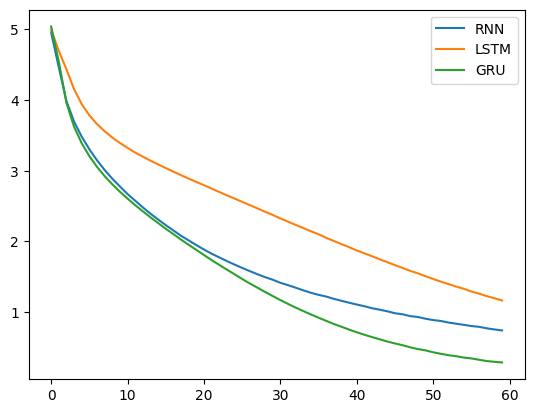

In [19]:
import matplotlib.pyplot as plt

loss_rnn = history_rnn.history['loss']
loss_lstm = history_lstm.history['loss']
loss_gru = history_gru.history['loss']

plt.plot(np.arange(len(loss_rnn)), loss_rnn, label="RNN")
plt.plot(np.arange(len(loss_lstm)), loss_lstm, label="LSTM")
plt.plot(np.arange(len(loss_gru)), loss_gru, label="GRU")
plt.legend()
plt.show()

誤差はまだ収束していないので、さらにエポック数を重ねることにより結果は改善しそうです。  
今回は文章の生成を行いましたが、同様にしてRNNを市場予測や自動作曲などに応用することも可能です。

## さらに自然な文章の生成のために
さらに自然な文章生成が可能なモデルを作るために、例えば以下のようなアプローチが有効かもしれません。

* **入力を単語ベクトルにする**  
入力をone-hot表現ではなくword2vecなどの技術により作る単語ベクトルにします。  
これにより、入力の次元数が抑えられるだけではなく、単語同士の関係性がモデルの訓練前にすでに存在することになります。    
word2vecについては、Udemyコース「自然言語処理とチャットボット: AIによる文章生成と会話エンジン開発」で詳しく解説しています。

* **コーパスをさらに大きくする**  
一般的に、コーパスが大きいほどモデルの汎用性は高まります。  
しかしながら、学習かかる時間が長くなるのが問題です。  

* **最新のアルゴリズムを採用する**  
自然言語処理の分野では日々新しい技術が生まれ、論文などで発表されています。  
興味のある方は、そのような技術をモデルに取り入れてみましょう。